In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('Data Preprocessing/dataset/position_salaries.csv')

In [10]:
data.head()   #the position column values are not repeatative ...so we will leave them
#if they would have been repeatative we would have applied one hot encoding

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
data.shape

(10, 3)

In [12]:
x=data.iloc[:,1:2].values

In [13]:
x.shape

(10L, 1L)

In [14]:
x.itemsize

8

In [15]:
y=data.iloc[:,2:3].values

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#fitting with linear regression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#fitting with polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_reg=PolynomialFeatures(degree=4)   #3,4
x_poly=poly_reg.fit_transform(x)

In [31]:
pd.DataFrame(x_poly)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [32]:
#We can only transform the data using polynomial features...
#the class name is polynomial feature and it is just a data transformer whare we transform the data
# and then we do linear regression

In [33]:
lr1=LinearRegression()
lr1.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Visual Linear Regression Result

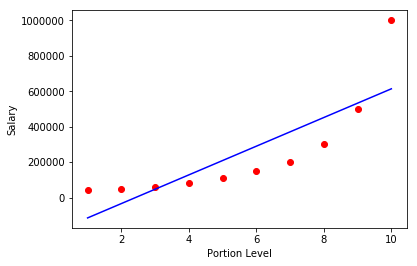

In [34]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.xlabel('Portion Level')
plt.ylabel('Salary')
plt.show()

In [35]:
# As we see that  this does not fit the regression line

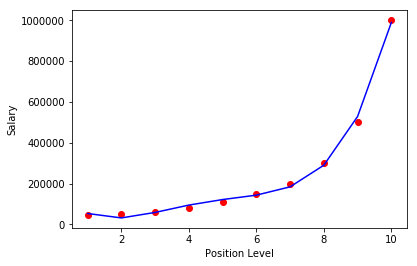

In [36]:
plt.scatter(x,y,color='red')
plt.plot(x,lr1.predict(poly_reg.transform(x)),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [37]:
lin_reg.predict(6.5) #here the prediction is very wrong as the value has to be between 15 to 20 lakh

array([[ 330378.78787879]])

In [38]:
lin_reg.intercept_+lin_reg.coef_[0]*6.5

array([ 330378.78787879])

# Prediction With polynomial Regression

In [40]:
lr1.predict(poly_reg.transform(6.5)) #the value for degree 3 is 13 lakh something we will use degree 4 its value is 15 lakh something which is accurate

array([[ 158862.45265153]])